In [1]:
import pandas as pd

# Loading sales data from csv file
sales_data = pd.read_csv("supermarket_sales.csv")


In [2]:
# Displaying the first 5 rows of the Data Frame(sales data)
print(sales_data.head())


    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total  \
0       Health and beauty       74.69         7  26.1415  548.9715   
1  Electronic accessories       15.28         5   3.8200   80.2200   
2      Home and lifestyle       46.33         7  16.2155  340.5255   
3       Health and beauty       58.22         8  23.2880  489.0480   
4       Sports and travel       86.31         7  30.2085  634.3785   

         Date   Time      Payment    cogs  gross margin percentage  \
0  01/05/2019  13:08      Ewallet  522.83                 4.761905   
1  03/08/2019  10:29         Cash   76.40                 4.761905   
2  03/03/2019  13:23

In [3]:
# Summary statistics
print(sales_data.describe())


        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875   

In [4]:
# Checking for missing values
print(sales_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
# Checking for any null values
print(sales_data.isnull().sum())

# One can also use 'sales_data.isna().sum()' to check for null values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


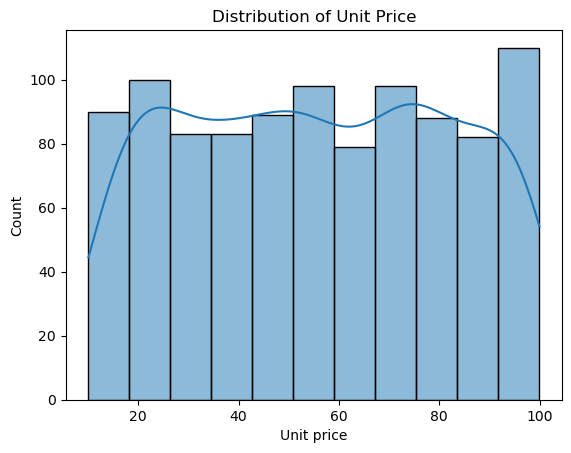

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of 'Unit price'
sns.histplot(sales_data['Unit price'], kde=True)
plt.title('Distribution of Unit Price')
plt.show()


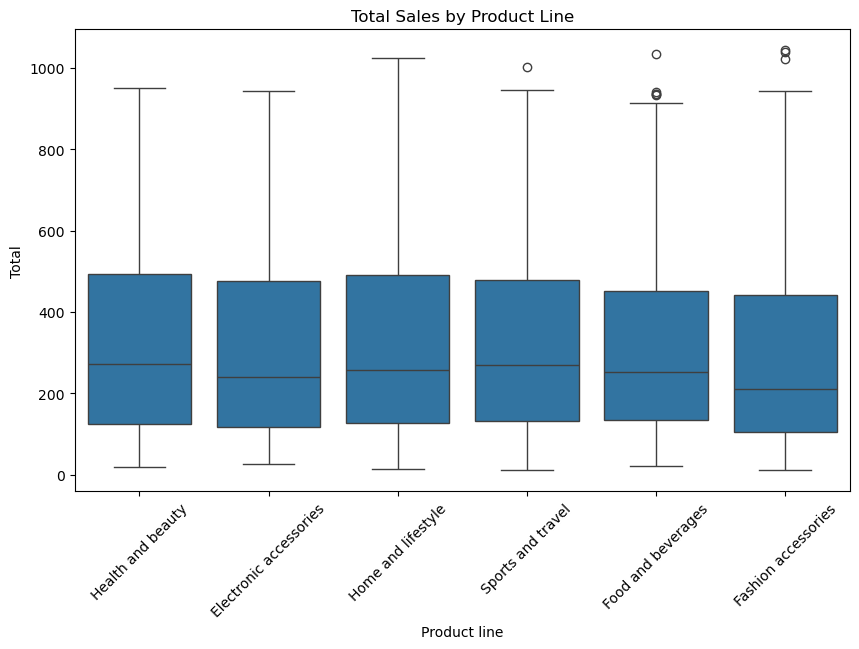

In [7]:
# Boxplot for 'Total' sales across product lines
plt.figure(figsize=(10,6))
sns.boxplot(x='Product line', y='Total', data=sales_data)
plt.title('Total Sales by Product Line')
plt.xticks(rotation=45)
plt.show()


Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64


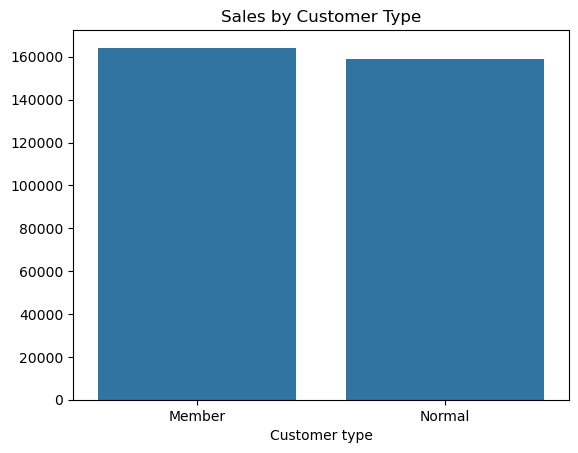

In [8]:
#customer segement

#sales by customer type
customer_type_sales = sales_data.groupby('Customer type')['Total'].sum()
print(customer_type_sales)

# Visualize Sales by Customer Type
sns.barplot(x=customer_type_sales.index, y=customer_type_sales.values)
plt.title('Sales by Customer Type')
plt.show()


Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64


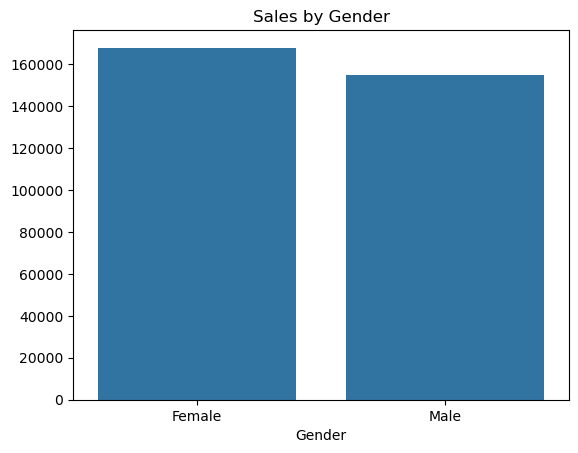

In [9]:
# Sales by Gender
gender_sales = sales_data.groupby('Gender')['Total'].sum()
print(gender_sales)

# Visualize Sales by Gender
sns.barplot(x=gender_sales.index, y=gender_sales.values)
plt.title('Sales by Gender')
plt.show()


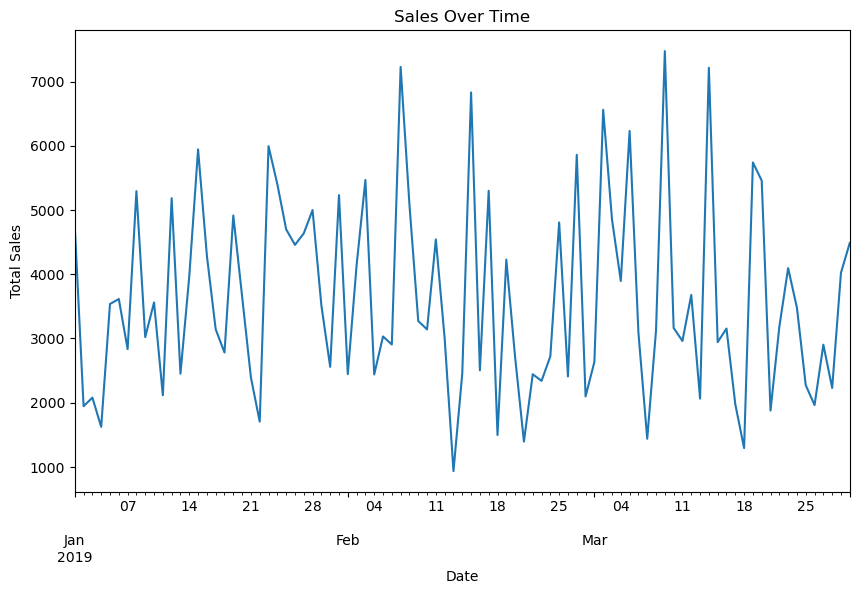

In [10]:
# Sales analysis
# Time based analysis

# Converting 'Date' column to datetime
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Grouping by date to analyze sales over time
daily_sales = sales_data.groupby('Date')['Total'].sum()

# Plot sales over time
plt.figure(figsize=(10,6))
daily_sales.plot()
plt.title('Sales Over Time')
plt.ylabel('Total Sales')
plt.show()


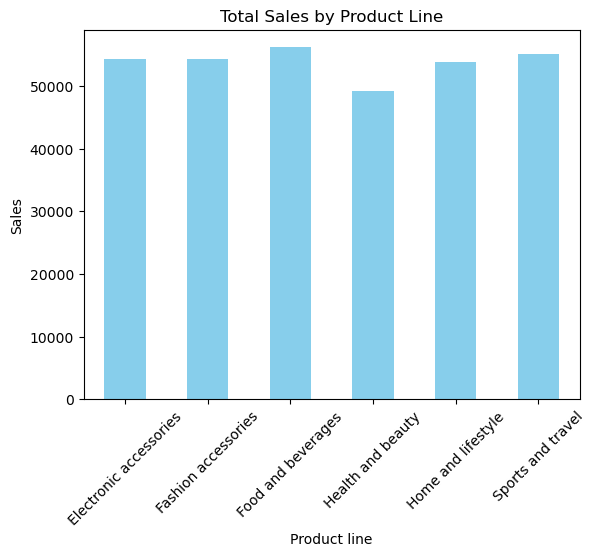

In [11]:
# Product line performance
# Total revenue by Product Line
product_line_sales = sales_data.groupby('Product line')['Total'].sum()

# Plotting
product_line_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Line')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


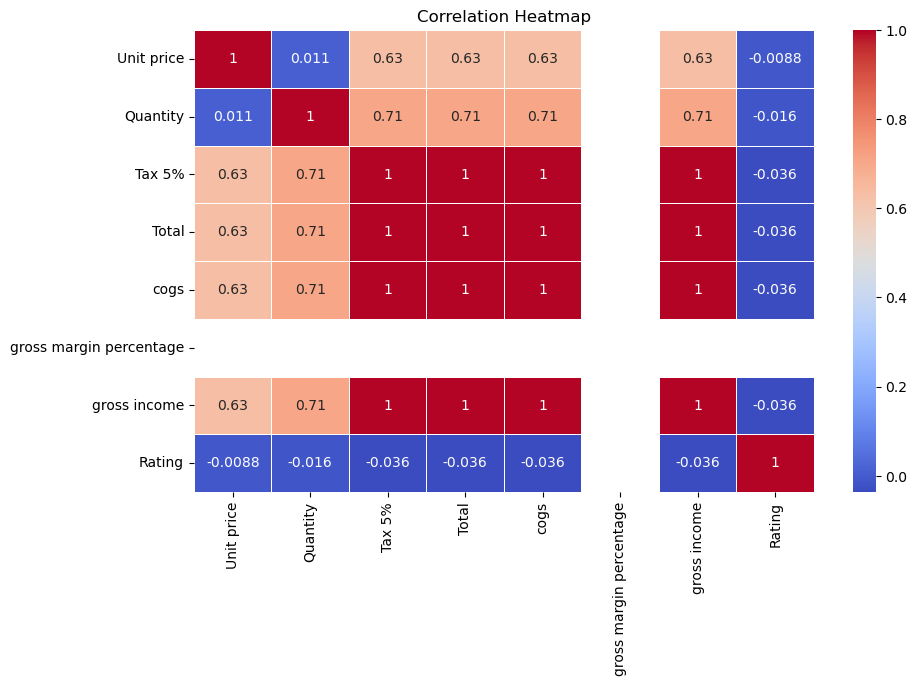

In [12]:
# Correlation matrix 
# Analyzing correlations between nuerical variables like unit_price, Quantity, Total and Rating

# Select only numerical columns from the dataset
numerical_cols = sales_data.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
corr_matrix = numerical_cols.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


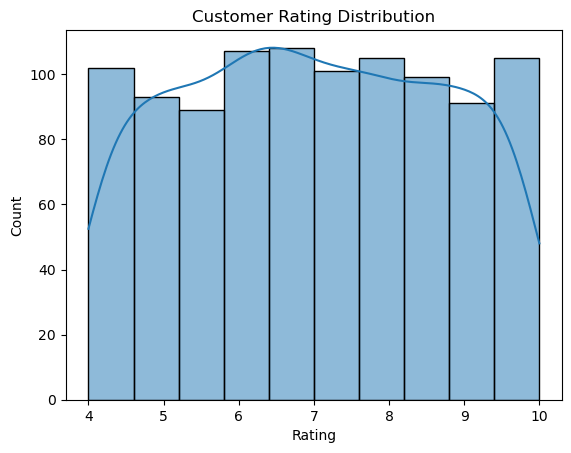

In [13]:
# Customer satisfaction
# Distribution of 'Rating'
sns.histplot(sales_data['Rating'], bins=10, kde=True)
plt.title('Customer Rating Distribution')
plt.show()


In [14]:
# Customer rating Distribution
# Compute the average rating
average_rating = sales_data['Rating'].mean()

# Compute the mean rating for each product line
rating_by_product_line = sales_data.groupby('Product line')['Rating'].mean()

# Identify the product line with the highest and lowest ratings
highest_rating_product_line = rating_by_product_line.idxmax()
highest_rating_value = rating_by_product_line.max()

lowest_rating_product_line = rating_by_product_line.idxmin()
lowest_rating_value = rating_by_product_line.min()

# Print the insights
print(f"Customer Rating Distribution:\n"
      f"The average customer rating is {average_rating:.1f}, with the highest ratings received for {highest_rating_product_line} ({highest_rating_value:.1f}).\n"
      f"Lower ratings were observed for the '{lowest_rating_product_line}' category ({lowest_rating_value:.1f}), indicating potential room for improvement in this segment.")

Customer Rating Distribution:
The average customer rating is 7.0, with the highest ratings received for Food and beverages (7.1).
Lower ratings were observed for the 'Home and lifestyle' category (6.8), indicating potential room for improvement in this segment.


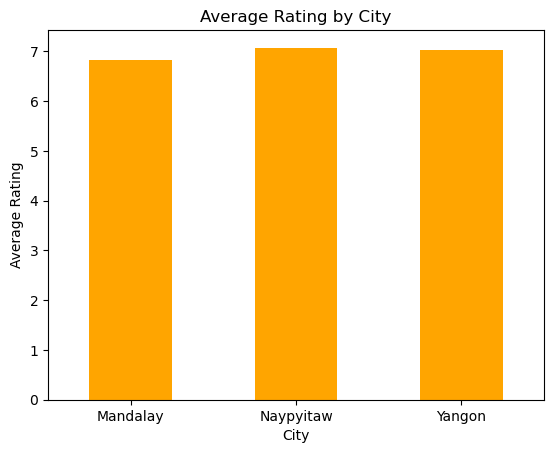

In [15]:
# Average rating by City
city_ratings = sales_data.groupby('City')['Rating'].mean()

# Plotting
city_ratings.plot(kind='bar', color='orange')
plt.title('Average Rating by City')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()


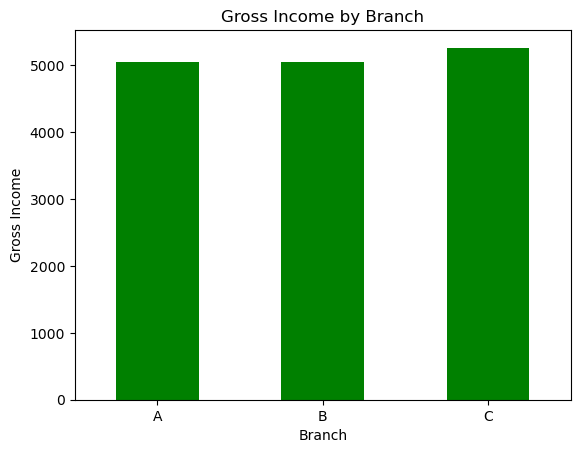

In [16]:
# Revenue and profitability analysis
# Branch performance

# Gross income by Branch
branch_gross_income = sales_data.groupby('Branch')['gross income'].sum()

# Plotting
branch_gross_income.plot(kind='bar', color='green')
plt.title('Gross Income by Branch')
plt.ylabel('Gross Income')
plt.xticks(rotation=0)
plt.show()


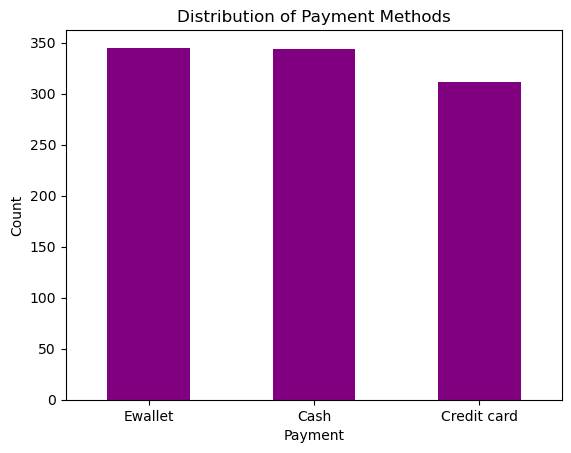

In [17]:
# Payment method preference
# Count of payment methods
payment_method_count = sales_data['Payment'].value_counts()

# Plotting
payment_method_count.plot(kind='bar', color='purple')
plt.title('Distribution of Payment Methods')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


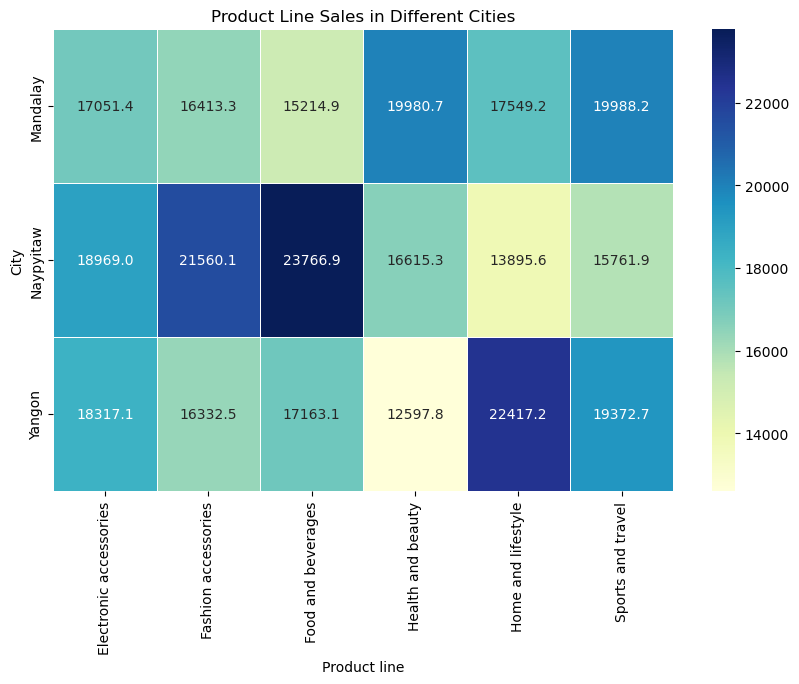

In [18]:
# Product analysis
# Total sales by Product Line and City
product_city_sales = sales_data.groupby(['City', 'Product line'])['Total'].sum().unstack()

# Heatmap of product line sales in each city
plt.figure(figsize=(10,6))
sns.heatmap(product_city_sales, annot=True, fmt=".1f", cmap='YlGnBu', linewidths=0.5)
plt.title('Product Line Sales in Different Cities')
plt.show()


In [19]:
# Key performing indicators(KPI)
# Total sales
total_sales = sales_data['Total'].sum()

# Average sales per customer
avg_sales_per_customer = sales_data['Total'].mean()

# Top 3 product lines by sales
top_product_lines = sales_data.groupby('Product line')['Total'].sum().nlargest(3)

print(f"Total Sales: {total_sales}")
print(f"Average Sales per Customer: {avg_sales_per_customer}")
print(f"Top 3 Product Lines by Sales:\n{top_product_lines}")


Total Sales: 322966.749
Average Sales per Customer: 322.966749
Top 3 Product Lines by Sales:
Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Name: Total, dtype: float64


# Introduction
This analysis was conducted on a supermarket sales dataset to better understand customer behavior, sales trends, and product performance. The dataset comprises a variety of variables, including sales data by customer type, gender, city, and product line.

# Key Insights
## Customer Segment
**Sales by customer type:** 
Members contributed significantly more to total sales (164,223) than regular customers (158,743). This implies that the loyalty program is beneficial, but there may be opportunities to convert more Normal customers into Members.

**Sales by gender:** 
Female customers generated more sales (167,882) than male consumers (155,083). Marketing strategies may focus on better understanding female consumers' purchasing habits or discovering male customers' demands in order to increase their spending.

## Sales Analysis
**Branch Performance:** 
Branch C has the greatest gross income (5,265.18), followed closely by branches A (5,057.16) and B (5,057.03). While the difference between Branches A and B is minor, Branch C exceeded both, indicating increased profitability. This implies that Branch C may have more customers, a better product mix, or more effective sales methods.

**Sales over time:** 
Sales statistics show a pattern of regular performance, with notable peaks around weekends and mid-month. February, in particular, exhibits increased sales, possibly due to occasions such as Valentine's Day, whilst March maintains good sales throughout. Specific high points, such as February 7 and March 9, indicate effective times for marketing or special deals. On the other hand, certain days, such as February 13, had lower sales, indicating potential gaps in customer activity that may be fixed. Overall, focusing marketing efforts around weekends, mid-month times, and critical days such as February 14 may increase sales.

## Product Performance
**Top product line:**
Fashion Accessories and Food and Beverages are the leading categories in Naypyitaw, with 21,560.07 and 23,766.86 respectively. Mandalay ranks first in Health and Beauty, followed by Sports and Travel at 19,980.66 and 19,988.20 , respectively. Yangon has significant sales in Home and Lifestyle and Sports and Travel, totaling 22,417.20 and 19,372.70, respectively.

## Payment Method Preference
**Payment Distribution:**
E-wallets were the most popular payment option, followed by cash and credit cards. This suggests that digital payment methods are becoming increasingly popular, and the store should continue to optimize e-wallet choices and give incentives to encourage customers to utilize them.


## Customer Satisfaction
**Customer Rating Distribution:**
The average customer rating is 7.0, with the highest ratings given to Food and Beverages at 7.1. The Home and Lifestyle category received the lowest ratings at 6.8, suggesting opportunities for improvement in this segment, such as enhancing product quality or variety.